# **Installing Necessary Libraries**

Dataset Source: https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset

In [1]:
!pip install -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install -q git+https://github.com/huggingface/datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q git+https://github.com/huggingface/accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install -q ipython-autotime

In [5]:

%load_ext autotime

time: 272 µs (started: 2023-09-08 14:03:58 +00:00)


In [6]:
!pip install -q evaluate

time: 5.02 s (started: 2023-09-08 14:03:58 +00:00)


# **Importing Necessary Libraries**

In [7]:
# Import necessary libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import datasets and related modules
import datasets
from datasets import Dataset, DatasetDict

# Import PyTorch and Hugging Face Transformers
import torch
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Import training and evaluation components
from transformers import TrainingArguments, Trainer, set_seed, DataCollatorWithPadding

# Import evaluation module
import evaluate


time: 6.3 s (started: 2023-09-08 14:04:03 +00:00)


In [8]:
# Setting Seed
set_seed(42)

time: 3.28 ms (started: 2023-09-08 14:04:09 +00:00)


# **Library Versions**

In [9]:
library_versions = {
    "Python": sys.version.split()[0],
    "NumPy": np.__version__,
    "Pandas": pd.__version__,
    "Datasets": datasets.__version__,
    "Transformers": transformers.__version__,
    "Torch": torch.__version__,
    "Evaluate": evaluate.__version__,
}

for name, version in library_versions.items():
    print(name.rjust(15), ":", version)

         Python : 3.10.12
          NumPy : 1.23.5
         Pandas : 1.5.3
       Datasets : 2.14.6.dev0
   Transformers : 4.34.0.dev0
          Torch : 2.0.1+cu118
       Evaluate : 0.4.0
time: 1.34 ms (started: 2023-09-08 14:04:09 +00:00)


In [10]:
!nvidia-smi

Fri Sep  8 14:04:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Loading Dataset**

In [11]:
!pip install -q opendatasets

time: 5.02 s (started: 2023-09-08 14:04:09 +00:00)


In [12]:
import opendatasets as od

time: 23.3 ms (started: 2023-09-08 14:04:14 +00:00)


In [13]:
od.download("https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset")

Skipping, found downloaded files in "./password-strength-classifier-dataset" (use force=True to force download)
time: 1.97 ms (started: 2023-09-08 14:04:14 +00:00)


# **Loading and Preprocessing Dataset**

In [14]:
data = pd.read_csv("/content/password-strength-classifier-dataset/data.csv",
                   engine='c',
                   on_bad_lines='skip')

data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


time: 387 ms (started: 2023-09-08 14:04:14 +00:00)


In [15]:
# Drop rows with missing values
data.dropna(inplace=True)

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669634,10redtux10,1
669635,infrared1,1
669636,184520socram,1
669637,marken22a,1


time: 335 ms (started: 2023-09-08 14:04:15 +00:00)


# **Defining Dictionaries to Convert Between String & Integer Class Values**

In [16]:
unique_classes = [
    "weak",
    "medium",
    "strong"
    ]

id2label = {idx:label for idx, label in enumerate(unique_classes)}
label2id = {label:idx for idx, label in enumerate(unique_classes)}
NUM_OF_LABELS = len(unique_classes)
NUM_OF_LABELS

3

time: 3.64 ms (started: 2023-09-08 14:04:15 +00:00)


# **Combination of Upper and Lower Characters, Numeric, and Special characters**

In [17]:
import seaborn as sns

time: 47.3 ms (started: 2023-09-08 14:04:15 +00:00)


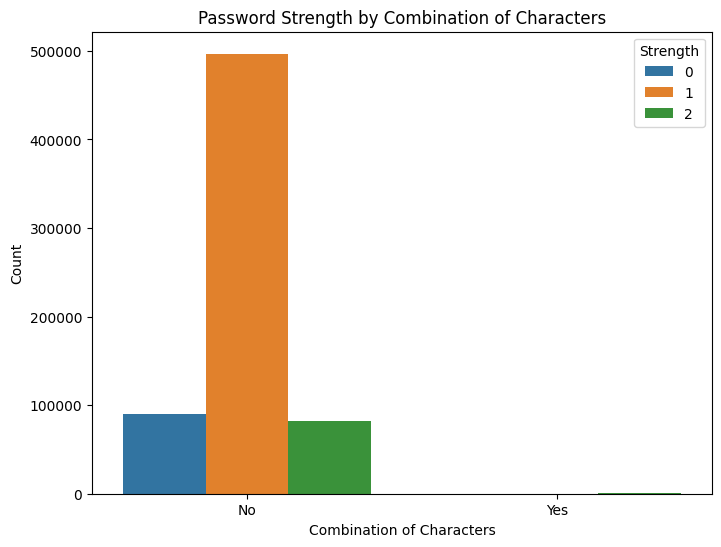

time: 875 ms (started: 2023-09-08 14:04:15 +00:00)


In [18]:
data['combination'] = data['password'].str.contains(r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@$!%*?&])[A-Za-z\d@$!%*?&]+$')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='combination', hue='strength')
plt.title('Password Strength by Combination of Characters')
plt.xlabel('Combination of Characters')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Strength', loc='upper right')
plt.show()
data.drop(columns=['combination'], inplace=True)

# **Password Strength by Combination of Upper and Lower Characters (No Numeric or Special)**

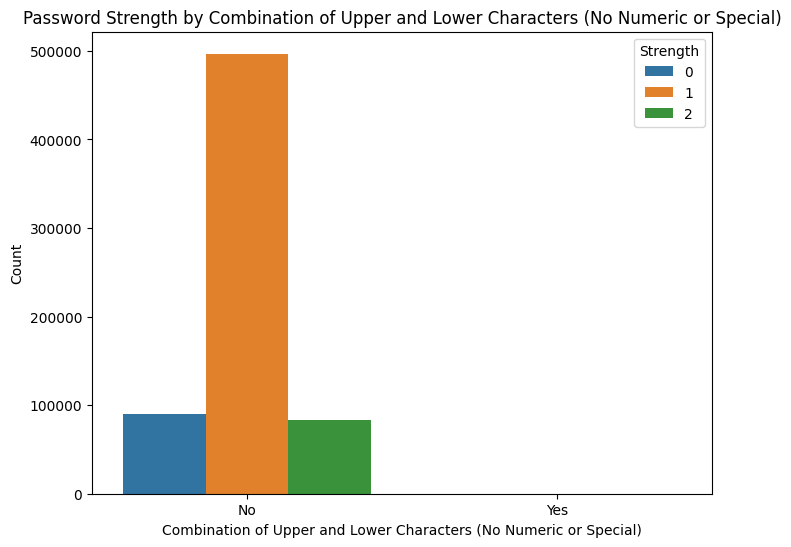

time: 915 ms (started: 2023-09-08 14:04:16 +00:00)


In [19]:
data['upper_lower_no_numeric_special'] = data['password'].str.contains(r'^(?=.*[a-z])(?=.*[A-Z])[^0-9@$!%*?&]+$')

# Plot the count of password strengths for this combination
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='upper_lower_no_numeric_special', hue='strength')
plt.title('Password Strength by Combination of Upper and Lower Characters (No Numeric or Special)')
plt.xlabel('Combination of Upper and Lower Characters (No Numeric or Special)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Strength', loc='upper right')
plt.show()

# Drop the temporary column
data.drop(columns=['upper_lower_no_numeric_special'], inplace=True)

# **Password Strength by Combination of Lowercase and Numeric Characters**

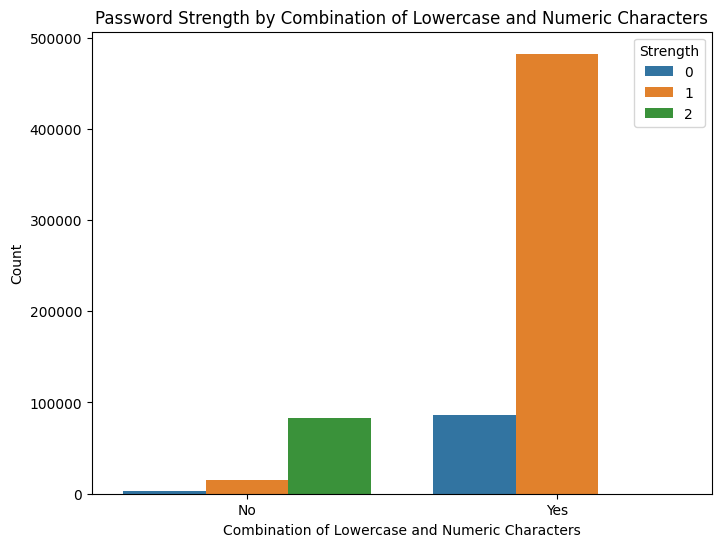

time: 803 ms (started: 2023-09-08 14:04:17 +00:00)


In [20]:
data['lower_numeric'] = data['password'].str.contains(r'^(?=.*[a-z])(?=.*\d)[a-z\d]+$')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='lower_numeric', hue='strength')
plt.title('Password Strength by Combination of Lowercase and Numeric Characters')
plt.xlabel('Combination of Lowercase and Numeric Characters')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Strength', loc='upper right')
plt.show()
data.drop(columns=['lower_numeric'], inplace=True)

# **Password Strength by Combination of Lowercase Characters and Special Characters (No Uppercase or Numeric)**

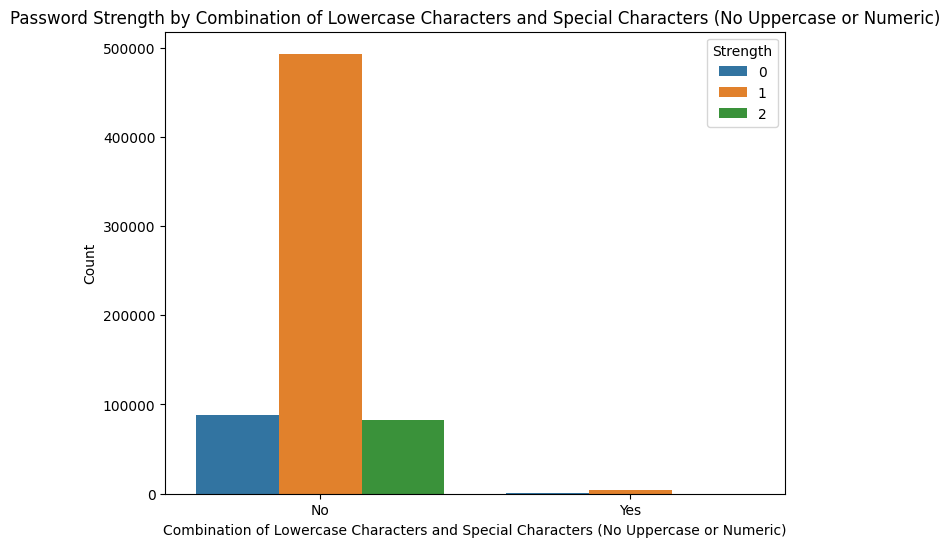

time: 826 ms (started: 2023-09-08 14:04:18 +00:00)


In [21]:
data['lower_special_no_upper_numeric'] = data['password'].str.contains(r'^(?=.*[a-z])[^A-Z0-9]+$')

# Plot the count of password strengths for this combination
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='lower_special_no_upper_numeric', hue='strength')
plt.title('Password Strength by Combination of Lowercase Characters and Special Characters (No Uppercase or Numeric)')
plt.xlabel('Combination of Lowercase Characters and Special Characters (No Uppercase or Numeric)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Strength', loc='upper right')
plt.show()

# Drop the temporary column
data.drop(columns=['lower_special_no_upper_numeric'], inplace=True)

# **Password Length Distribution by Strength**

In [22]:
data['password_length'] = data['password'].apply(len)


time: 167 ms (started: 2023-09-08 14:04:19 +00:00)


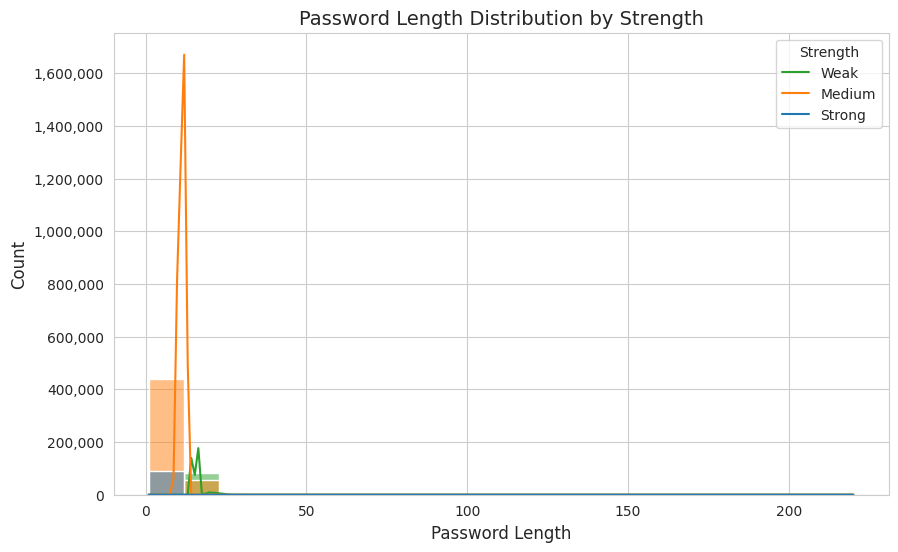

time: 3.38 s (started: 2023-09-08 14:04:19 +00:00)


In [23]:
# Create a figure and axis with Seaborn's whitegrid style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define custom colors
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Dark blue, orange, green

# Plot the histogram with KDE and color-coded by strength
sns.histplot(data=data, x='password_length', hue='strength', bins=20, kde=True, palette=custom_palette)

# Set the title and labels
plt.title('Password Length Distribution by Strength', fontsize=14)
plt.xlabel('Password Length', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend
plt.legend(title='Strength', loc='upper right', labels=['Weak', 'Medium', 'Strong'], fontsize=10)

# Format y-axis as integers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()

# **Boxplot for Password Length by Strength**

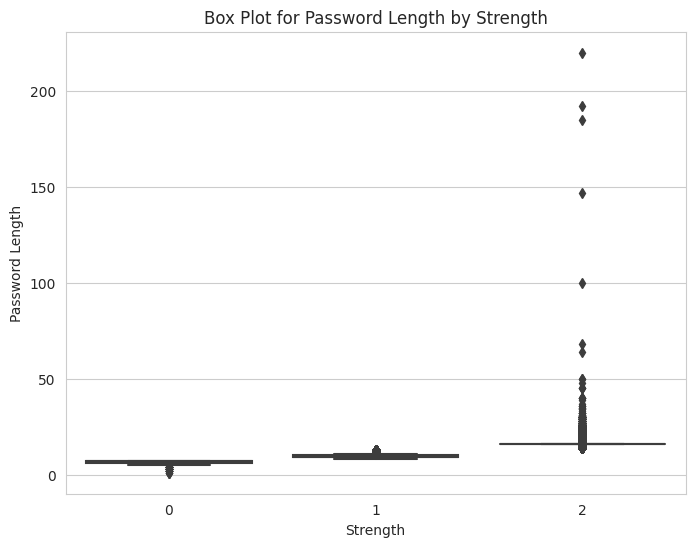

time: 418 ms (started: 2023-09-08 14:04:22 +00:00)


In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='strength', y='password_length', palette=custom_palette)
plt.title('Box Plot for Password Length by Strength')
plt.xlabel('Strength')
plt.ylabel('Password Length')
plt.show()


# **Strength Class Distribution**

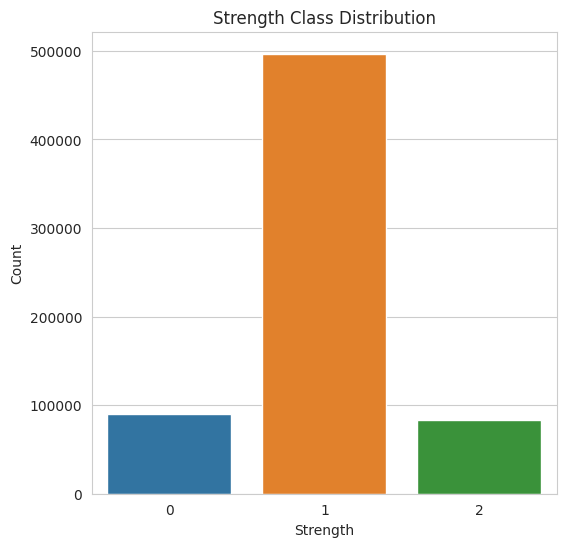

time: 211 ms (started: 2023-09-08 14:04:23 +00:00)


In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='strength', palette=custom_palette)
plt.title('Strength Class Distribution')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.show()

# **Calculate and Print Maximum, Minimum, and Average Password Lengths for Each Strength Class**

In [26]:
# Calculate and print maximum, minimum, and average password lengths for each strength class
for strength_class in data['strength'].unique():
    subset = data[data['strength'] == strength_class]

    max_length = subset['password_length'].max()
    min_length = subset['password_length'].min()
    avg_length = subset['password_length'].mean()

    print(f"Strength Class: {strength_class}")
    print(f"Maximum Password Length: {max_length}")
    print(f"Minimum Password Length: {min_length}")
    print(f"Average Password Length: {avg_length}\n")


Strength Class: 1
Maximum Password Length: 13
Minimum Password Length: 8
Average Password Length: 9.618964132519862

Strength Class: 2
Maximum Password Length: 220
Minimum Password Length: 14
Average Password Length: 15.932496962844462

Strength Class: 0
Maximum Password Length: 7
Minimum Password Length: 1
Average Password Length: 6.549603683348011

time: 51.4 ms (started: 2023-09-08 14:04:23 +00:00)


In [27]:
data

,password,strength,password_length
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11
...,...,...,...
669634,10redtux10,1,10
669635,infrared1,1,9
669636,184520socram,1,12
669637,marken22a,1,9


time: 7.04 ms (started: 2023-09-08 14:04:23 +00:00)


# **Removing Overly Length Passwords**

In [28]:
data = data[data["password_length"] < 40]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669622 entries, 0 to 669638
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   password         669622 non-null  object
 1   strength         669622 non-null  int64 
 2   password_length  669622 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 20.4+ MB
time: 112 ms (started: 2023-09-08 14:04:23 +00:00)


In [29]:
data.drop(columns=["password_length"], inplace=True)


time: 15.1 ms (started: 2023-09-08 14:04:23 +00:00)


<ipython-input-29-edb874083371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["password_length"], inplace=True)


In [30]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669634,10redtux10,1
669635,infrared1,1
669636,184520socram,1
669637,marken22a,1


time: 7.58 ms (started: 2023-09-08 14:04:23 +00:00)


# **Class Counts**

In [31]:
# Assuming your DataFrame has a 'strength' column for the class labels
class_counts = data['strength'].value_counts()

# Print the class counts
print("Class Counts:")
print(class_counts)


Class Counts:
1    496801
0     89701
2     83120
Name: strength, dtype: int64
time: 5.94 ms (started: 2023-09-08 14:04:23 +00:00)


# **Converting to HF dataset format**

In [32]:
data = data.rename(columns={"password": "text",
                            "strength": "label"})

dataset = Dataset.from_pandas(data)

time: 42.9 ms (started: 2023-09-08 14:04:23 +00:00)


In [33]:
dataset

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 669622
})

time: 2.33 ms (started: 2023-09-08 14:04:23 +00:00)


In [34]:
MODEL_CKPT = "microsoft/codebert-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL_CKPT,
                                             truncation=True,
                                             padding=True,
                                             batched=True,
                                             batch_size=None)

text_len = [len(tokenizer.encode(a)) for a in dataset["text"]]

print(f"The longest password length is {max(text_len)} tokens.")

The longest password length is 34 tokens.
time: 33.7 s (started: 2023-09-08 14:04:23 +00:00)


# **Split Dataset into Training & Evaluation Datasets**

In [35]:
# Split Dataset into Training & Evaluation Datasets
train_eval = dataset.train_test_split(train_size=0.90)

ds = DatasetDict({
    'train' : train_eval['train'],
    'eval' : train_eval['test'],
})

print("Training Dataset Shape:", ds['train'].shape)
print("Evaluation Dataset Shape:", ds['eval'].shape)

Training Dataset Shape: (602659, 3)
Evaluation Dataset Shape: (66963, 3)
time: 133 ms (started: 2023-09-08 14:04:57 +00:00)


In [36]:
NUM_OF_EPOCHS = 2

BATCH_SIZE = 16
LEARNING_RATE = 2e-5

MAX_LENGTH = 40
MODEL_CKPT = "microsoft/codebert-base"
MODEL_NAME = MODEL_CKPT.split("/")[-1] + "-password-strength-classifier-normal-weight-balancing"

METRIC_NAME = "f1"


time: 596 µs (started: 2023-09-08 14:04:57 +00:00)


# **Tokenize Entire Dataset**

In [37]:
# Define Tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_CKPT)

# Tokenize Method
def tokenize(batch):
    return tokenizer(batch['text'],
                     padding=True,
                     truncation=True,
                     max_length=MAX_LENGTH,
                     return_tensors="pt")

# Map tokenizer method to entire dataset
encoded_data = ds.map(tokenize, batched=True, batch_size=None)

print('Training data shape:', encoded_data['train'].shape)
print('Validation data shape:', encoded_data['eval'].shape)

print(encoded_data['train'].features)
print(encoded_data['train'])

Map:   0%|          | 0/602659 [00:00<?, ? examples/s]

Map:   0%|          | 0/66963 [00:00<?, ? examples/s]

Training data shape: (602659, 5)
Validation data shape: (66963, 5)
{'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None), '__index_level_0__': Value(dtype='int64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}
Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 602659
})
time: 44.1 s (started: 2023-09-08 14:04:57 +00:00)


# **Instantiate Model**

In [38]:
model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_CKPT,
        num_labels=NUM_OF_LABELS
    )

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 1.39 s (started: 2023-09-08 14:05:41 +00:00)


# **Function for Computing Metrics**

In [39]:
def compute_metrics(p):
    """
    This function takes the predictions output from
    trainer.evaluate & returns metrics (accuracy, F1,
    recall, & precision) for a multiclass
    classification project.
    """
    accuracy_metric = evaluate.load("accuracy")
    accuracy = accuracy_metric.compute(predictions=np.argmax(p.predictions,
                                                             axis=1),
                                       references=p.label_ids)['accuracy']

    ### ------------------- F1 scores -------------------

    f1_score_metric = evaluate.load("f1")
    weighted_f1_score = f1_score_metric.compute(predictions=np.argmax(p.predictions,
                                                                      axis=1),
                                                references=p.label_ids,
                                                average='weighted')["f1"]

    micro_f1_score = f1_score_metric.compute(predictions=np.argmax(p.predictions,
                                                                   axis=1),
                                             references=p.label_ids,
                                             average='micro')['f1']

    macro_f1_score = f1_score_metric.compute(predictions=np.argmax(p.predictions,
                                                                   axis=1),
                                             references=p.label_ids,
                                             average='macro')["f1"]

    ### ------------------- recall -------------------

    recall_metric = evaluate.load("recall")
    weighted_recall = recall_metric.compute(predictions=np.argmax(p.predictions,
                                                                  axis=1),
                                            references=p.label_ids,
                                            average='weighted')["recall"]

    micro_recall = recall_metric.compute(predictions=np.argmax(p.predictions,
                                                               axis=1),
                                         references=p.label_ids,
                                         average='micro')["recall"]

    macro_recall = recall_metric.compute(predictions=np.argmax(p.predictions,
                                                               axis=1),
                                         references=p.label_ids,
                                         average='macro')["recall"]

    ### ------------------- precision -------------------

    precision_metric = evaluate.load("precision")
    weighted_precision = precision_metric.compute(predictions=np.argmax(p.predictions,
                                                                        axis=1),
                                                  references=p.label_ids,
                                                  average='weighted')["precision"]

    micro_precision = precision_metric.compute(predictions=np.argmax(p.predictions,
                                                                     axis=1),
                                               references=p.label_ids,
                                               average='micro')["precision"]

    macro_precision = precision_metric.compute(predictions=np.argmax(p.predictions,
                                                                     axis=1),
                                               references=p.label_ids,
                                               average='macro')["precision"]

    return {"accuracy" : accuracy,
            "Weighted F1" : weighted_f1_score,
            "Micro F1" : micro_f1_score,
            "Macro F1" : macro_f1_score,
            "Weighted Recall" : weighted_recall,
            "Micro Recall" : micro_recall,
            "Macro Recall" : macro_recall,
            "Weighted Precision" : weighted_precision,
            "Micro Precision" : micro_precision,
            "Macro Precision" : macro_precision
            }

time: 978 µs (started: 2023-09-08 14:05:43 +00:00)


# **Define TrainingArguments**

In [40]:
training_args = TrainingArguments(
    output_dir=MODEL_NAME,
    num_train_epochs=NUM_OF_EPOCHS,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    log_level="error",
    logging_strategy='epoch',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_first_step=True,
    load_best_model_at_end=True,
    disable_tqdm=False,
    push_to_hub=True
)

time: 30.8 ms (started: 2023-09-08 14:05:43 +00:00)


# **Define Data Collator**

In [41]:
data_collator = DataCollatorWithPadding(tokenizer, padding=True)

time: 328 µs (started: 2023-09-08 14:05:43 +00:00)


# **Subclass Trainer to Handle Class Imbalance**

In [42]:
DEVICE = "cuda"

time: 317 µs (started: 2023-09-08 14:05:43 +00:00)


In [43]:
total_samples = 496801 + 89701 + 83120
weights = torch.tensor([total_samples/496801, total_samples/89701, total_samples/83120])

# Normalize the weights for numerical stability
weights = weights / weights.sum()

weights = weights.to(DEVICE)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

time: 2.28 s (started: 2023-09-08 14:05:43 +00:00)


# **Instantiate Trainer and Commence Training**

In [44]:
from huggingface_hub import notebook_login
notebook_login()

time: 20.1 ms (started: 2023-09-08 14:05:45 +00:00)


In [45]:
trainer = CustomTrainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=encoded_data['train'],
                  eval_dataset=encoded_data['eval'],
                  data_collator=data_collator,
                  tokenizer=tokenizer)

time: 429 ms (started: 2023-09-08 14:05:45 +00:00)


In [46]:
train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Weighted f1,Micro f1,Macro f1,Weighted recall,Micro recall,Macro recall,Weighted precision,Micro precision,Macro precision
1,0.034500,0.052175,0.982498,0.982915,0.982498,0.975526,0.982498,0.982498,0.991471,0.984424,0.982498,0.961899
2,0.009900,0.008292,0.997655,0.997660,0.997655,0.996570,0.997655,0.997655,0.997880,0.997672,0.997655,0.995275


time: 1h 7min 51s (started: 2023-09-08 14:05:45 +00:00)


In [47]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


***** train metrics *****
  epoch                    =        2.0
  total_flos               = 19613437GF
  train_loss               =     0.0222
  train_runtime            = 1:06:59.56
  train_samples_per_second =    299.863
  train_steps_per_second   =     18.742
time: 7.19 s (started: 2023-09-08 15:13:36 +00:00)


# **Evaluate Model**



In [48]:
metrics = trainer.evaluate(encoded_data['eval'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        2.0
  eval_Macro F1           =     0.9966
  eval_Macro Precision    =     0.9953
  eval_Macro Recall       =     0.9979
  eval_Micro F1           =     0.9977
  eval_Micro Precision    =     0.9977
  eval_Micro Recall       =     0.9977
  eval_Weighted F1        =     0.9977
  eval_Weighted Precision =     0.9977
  eval_Weighted Recall    =     0.9977
  eval_accuracy           =     0.9977
  eval_loss               =     0.0083
  eval_runtime            = 0:01:13.28
  eval_samples_per_second =    913.796
  eval_steps_per_second   =     57.123
time: 1min 13s (started: 2023-09-08 15:13:44 +00:00)


# **Push to Hub**

In [49]:
trainer.push_to_hub()

'https://huggingface.co/DrishtiSharma/codebert-base-password-strength-classifier-normal-weight-balancing/tree/main/'

time: 5.61 s (started: 2023-09-08 15:14:57 +00:00)


# **Inference**

In [51]:
model_name = "DrishtiSharma/codebert-base-password-strength-classifier-normal-weight-balancing"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)



time: 1.99 s (started: 2023-09-08 15:47:24 +00:00)


In [55]:
def predict_strength(password):
    inputs = tokenizer(password, return_tensors="pt", padding=True, truncation=True)
    return id2label[model(**inputs).logits.argmax(-1).item()]

# Test
print(f"'drishti123' is: {predict_strength('drishti123')}")

'drishti123' is: medium
time: 41.3 ms (started: 2023-09-08 15:57:12 +00:00)


In [60]:
# Test
print(f"'Drishti123' is: {predict_strength('Drishti123')}")

'Drishti123' is: strong
time: 36.8 ms (started: 2023-09-08 15:58:35 +00:00)


In [57]:
# Test
print(f"'drishti' is: {predict_strength('drishti')}")

'drishti' is: weak
time: 41.9 ms (started: 2023-09-08 15:57:34 +00:00)


In [58]:
# Test
print(f"'drishti@123' is: {predict_strength('drishti@123')}")

'drishti@123' is: strong
time: 44.1 ms (started: 2023-09-08 15:57:51 +00:00)
